In [51]:
%load_ext autoreload
%autoreload 2

import os
from datetime import datetime

#import numpy as np 
#import numpyro
import pandas as pd

from modeller import Modeller

#import seaborn as sns
#import matplotlib.pyplot as plt 

#from smoother import Smoother

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from modeller import VariableGroup

In [169]:
spec_new = {
    "name": "Sales",
    "seasonality": {                            # нет сезонности если нет секции
        "seasonality_period": 1,                # int, 1 - no seasonality 
        "seasonality_model": "discrete", 
        "seasonality_num_fouries_terms": None  # int / None
    },
    "y": "Volume",
    "X": [
        {
            "name": "Own media", 
            "type": "media",
            "scaling": "total",
            "saturation": True,
            "variables": [
                {"name": "TV", "column": "CH TV",                        "rolling": 3, "retention": (3, 1), "beta": 1, "force_positive": True},
                {"name": "OLV",   "column": "CH OLV",                    "rolling": 3, "retention": (3, 1), "beta": 1, "force_positive": True},
                {"name": "OOH", "column": "CH OOH",                      "rolling": 3, "retention": (3, 1), "beta": 1, "force_positive": True},
                {"name": "Radio",    "column": "CH RADIO",               "rolling": 3, "retention": (3, 1), "beta": 1, "force_positive": True},
                {"name": "Projects & bloggers", "column": "CH SP&BLOGG", "rolling": 3, "retention": (3, 1), "beta": 1, "force_positive": True},
                {"name": "Banners", "column": "CH BANN",                 "rolling": 1, "retention": (1, 3), "beta": 1, "force_positive": True},
                {"name": "E-com", "column": "CH ECOM",                   "rolling": 1, "retention": (1, 3), "beta": 1, "force_positive": True},
            ]
        }, 
        {
            "name": "Competitors media", 
            "type": "media",
            "scaling": "total",
            "saturation": False,
            "variables": [
                {"name": "Actimuno ads", "column": "Compets Actimuno",            "rolling": 3, "retention": (3, 1), "beta": 1, "force_positive": False},
                {"name": "Other competitors ads", "column": "Compets other",      "rolling": 3, "retention": (3, 1), "beta": 1, "force_positive": False},
            ]
        },
        {
            "name": "Pricing", 
            "type": "non-media",
            "scaling": "total",
            "variables": [
                {"name": "Price long", "column": "LongPriceIndex", "beta": 1, "force_positive": False}, 
                {"name": "Price short", "column": "ShortPriceIndex", "beta": 1, "force_positive": False},
            ]
        },
        {
            "name": "Other structural", 
            "type": "non-media",
            "scaling": "column",
            "variables": [
                {"name": "Brand", "column": "Brand modeled", "beta": 1, "force_positive": True}, 
                {"name": "Demand", "column": "Demand", "beta": 1, "force_positive": False},
                {"name": "SVO", "column": "SVO", "beta": 1, "force_positive": False},
                {"name": "WSD", "column": "WSD", "beta": 1, "force_positive": True},
            ]
        },
    ]
}

for v in spec_new["X"]:
    vg = VariableGroup().FromDict(v)
    print(vg.spec)

{'name': 'Own media', 'type': 'media', 'scaling': 'total', 'saturation': True, 'variables': [{'name': 'TV', 'column': 'CH TV', 'rolling': 3, 'retention': (3, 1), 'beta': 1, 'force_positive': True}, {'name': 'OLV', 'column': 'CH OLV', 'rolling': 3, 'retention': (3, 1), 'beta': 1, 'force_positive': True}, {'name': 'OOH', 'column': 'CH OOH', 'rolling': 3, 'retention': (3, 1), 'beta': 1, 'force_positive': True}, {'name': 'Radio', 'column': 'CH RADIO', 'rolling': 3, 'retention': (3, 1), 'beta': 1, 'force_positive': True}, {'name': 'Projects & bloggers', 'column': 'CH SP&BLOGG', 'rolling': 3, 'retention': (3, 1), 'beta': 1, 'force_positive': True}, {'name': 'Banners', 'column': 'CH BANN', 'rolling': 1, 'retention': (1, 3), 'beta': 1, 'force_positive': True}, {'name': 'E-com', 'column': 'CH ECOM', 'rolling': 1, 'retention': (1, 3), 'beta': 1, 'force_positive': True}]}
{'name': 'Competitors media', 'type': 'media', 'scaling': 'total', 'saturation': False, 'variables': [{'name': 'Actimuno ads',

In [161]:
vm = VariableGroup().FromDict(spec_new["X"][3])

start = datetime.now()
pd.DataFrame(vm.PrepareData(data)).to_excel("delete.me.xlsx")
print(datetime.now() - start)

0:00:01.151353


In [162]:
data_folder = "../2024 danone/"
data = pd.read_excel(data_folder + 'full_data.xlsx')
data.columns

Index(['date', 'TV Yoga', 'TV fig skates', 'TV Launch', 'TV 220 pack',
       'TV Skates', 'TV NCP promo', 'OLV', 'Digital other', 'OOH', 'Radio',
       'OLV new', 'Banners new', 'Special & bloggers', 'Ecom', 'CH TV',
       'CH OLV', 'CH OOH', 'CH RADIO', 'CH BANN', 'CH SP&BLOGG', 'CH ECOM',
       'CWSD', 'WSD', 'SVO', 'ShelfShare', 'Volume', 'Price', 'PriceIndex',
       'LongPriceIndex', 'ShortPriceIndex', 'PromoPercent', 'Brand',
       'Brand modeled', 'Category', 'Demand', 'CompetsMedia',
       'Compets Actimuno', 'Compets other', 'Compets other -22',
       'Compets other 22+', 'Actimel', 'Actimuno'],
      dtype='object')

In [176]:
m = Modeller().PrepNoFit(spec_new, data)

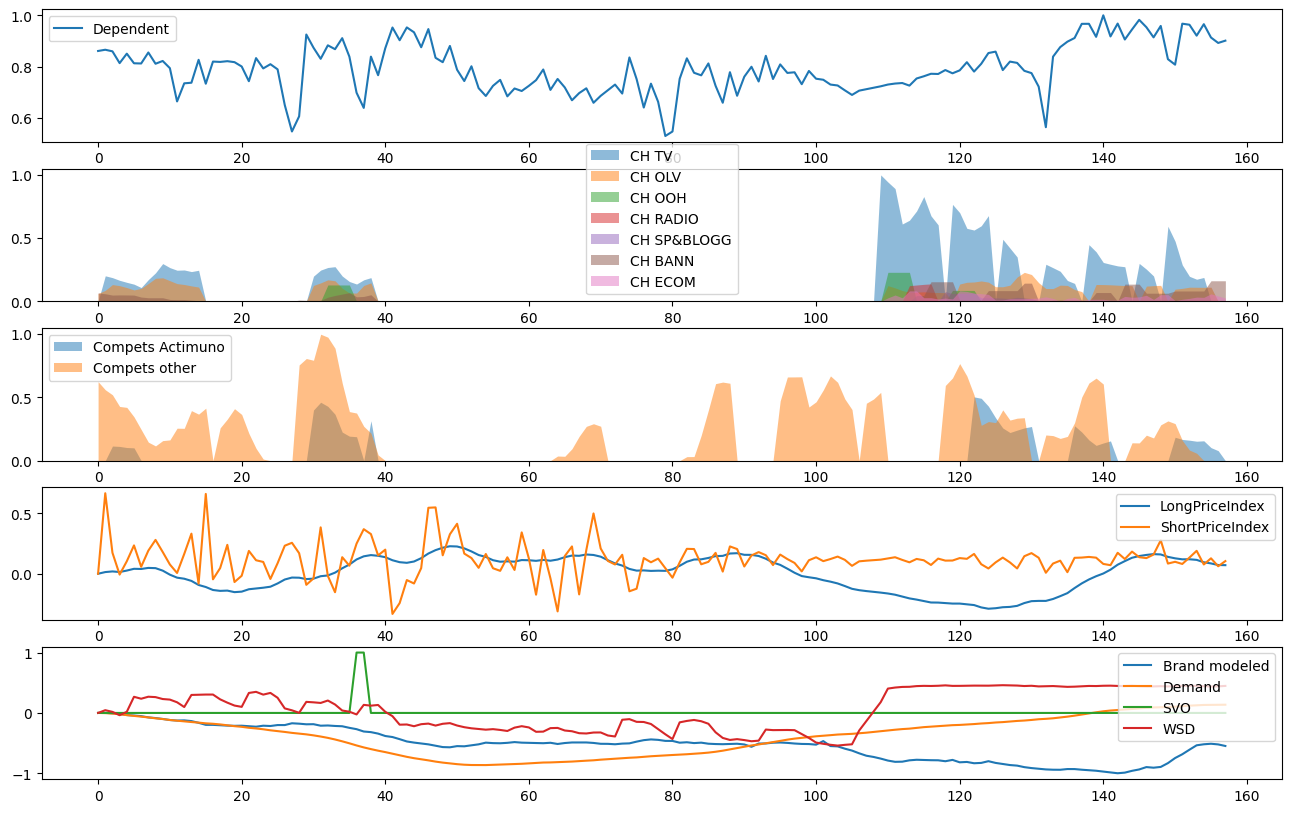

In [185]:
m.PlotInputs()